# Initializing Environment and Loading the Correct Data #

In [5]:
!pip3 install openpyxl
!pip3 install seaborn
!pip3 install pandas

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
planes = pd.read_excel("Business_Dataset.xlsx")
planes

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [8]:
planes = planes.drop(["tbl", "citymarketid_1", "citymarketid_2", 'Geocoded_City1', "Geocoded_City2", "tbl1apk"], axis = 1)

In [9]:
# Select only numerical columns
numeric_columns = ['airportid_1', 'airportid_2', 'Year','quarter', 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']

# Create a subset with the selected numerical columns
planes_numeric = planes[numeric_columns]

# Exploratory Analyses #

## What is the number of unique routes? ##

In [10]:
grouped_routes = planes.groupby(["airport_1", "airport_2"]).size().reset_index(name = "count")
grouped_routes #4069 unique routes

,airport_1,airport_2,count
0,ABE,CHI,5
1,ABE,MCO,5
2,ABE,MDW,15
3,ABE,ORD,15
4,ABE,PIE,13
...,...,...,...
4064,XNA,LGA,73
4065,XNA,LGB,19
4066,XNA,ONT,32
4067,XNA,SNA,32


## What did Delta do that American Airlines did not? ##

Delta had a better Basic earnings per share and operating income than American Airlines in 2024 Quarter 2, 2024 Quarter 1, and 2023 Quarter 4. We wanted to use `planes` to see if we could identify any differences in pricing between the two companies, which could have potentially contributed to the differences in performance between the two companies. 

### American Airlines ###

2024: Quarter 1

In [11]:
american_2024_q1 = planes.loc[(planes["carrier_lg"] == "AA") & (planes['Year'] == 2024) & (planes['quarter'] == 1)]
print('Average Market Share: ' + str(np.mean(american_2024_q1['large_ms'].values)))
print('What did American Charge on Average: ' + str(np.mean(american_2024_q1['fare_lg'].values)))
print('What did the Market Charge on Average: ' + str(np.mean(american_2024_q1['fare'].values)))

Average Market Share: 0.6838514412416851
What did American Charge on Average: 306.2052993348115
What did the Market Charge on Average: 301.64481152993346


2023: Quarter 4

In [12]:
american_2023_q4 = planes.loc[(planes["carrier_lg"] == "AA") & (planes['Year'] == 2023) & (planes['quarter'] == 4)]
print('Average Market Share: ' + str(np.mean(american_2023_q4['large_ms'].values)))
print('What did American Charge on Average: ' + str(np.mean(american_2023_q4['fare_lg'].values)))
print('What did the Market Charge on Average: ' + str(np.mean(american_2023_q4['fare'].values)))

Average Market Share: 0.6725776805251641
What did American Charge on Average: 298.60457330415755
What did the Market Charge on Average: 292.91849015317285


### Delta ###

2024: Quarter 1

In [13]:
delta_2024_q1 = planes.loc[(planes["carrier_lg"] == "DL") & (planes['Year'] == 2024) & (planes['quarter'] == 1)]
print('Average Market Share: ' + str(np.mean(delta_2024_q1['large_ms'].values)))
print('What did American Charge on Average: ' + str(np.mean(delta_2024_q1['fare_lg'].values)))
print('What did the Market Charge on Average: ' + str(np.mean(delta_2024_q1['fare'].values)))

Average Market Share: 0.6070420353982302
What did American Charge on Average: 308.2504424778761
What did the Market Charge on Average: 280.5449557522124


2023: Quarter 4

In [14]:
delta_2023_q4 = planes.loc[(planes["carrier_lg"] == "DL") & (planes['Year'] == 2023) & (planes['quarter'] == 4)]
print('Average Market Share: ' + str(np.mean(delta_2023_q4['large_ms'].values)))
print('What did American Charge on Average: ' + str(np.mean(delta_2023_q4['fare_lg'].values)))
print('What did the Market Charge on Average: ' + str(np.mean(delta_2023_q4['fare'].values)))

Average Market Share: 0.6124642105263158
What did American Charge on Average: 306.627
What did the Market Charge on Average: 278.04526315789474


## A Pattern in Pricing ##

In [15]:
percent_diff = []
lowest_avg_share = []
for start, end in (grouped_routes.values[:, 0:2]):
    sample_route = planes.loc[(planes["airport_1"] == start) & (planes["airport_2"] == end)]
    fares = sample_route[['fare', 'fare_low']].values
    average_route_fair, average_fair_lowest_share = np.average(fares, axis = 0)
    percent_diff.append((abs(average_route_fair - average_fair_lowest_share)/((average_fair_lowest_share + average_route_fair)/2)) * 100)
    #
    #Average Lowest Market Share
    lowest_avg_share.append(np.average(sample_route['lf_ms'].values))
#
percent_diff = np.array(percent_diff)
lowest_avg_share = np.array(lowest_avg_share)
percent_diff, lowest_avg_share

(array([12.32273594, 49.60415348, 12.67957605, ..., 20.98228261,
        13.4542715 ,  7.20078586]),
 array([0.59      , 0.232     , 0.45933333, ..., 0.29958438, 0.39283125,
        0.75549649]))

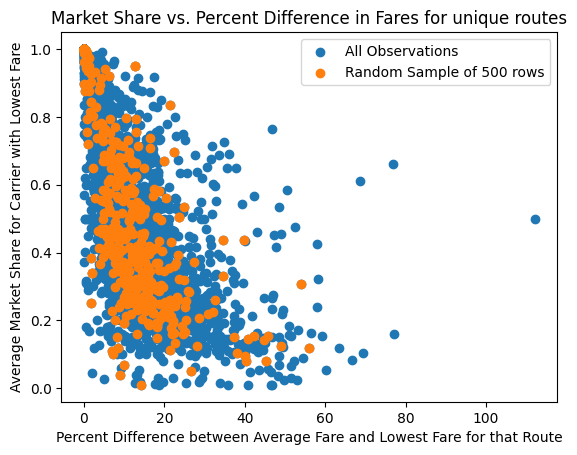

In [37]:
plt.scatter(percent_diff, lowest_avg_share, label = "All Observations")
plt.xlabel('Percent Difference between Average Fare and Lowest Fare for that Route')
plt.ylabel('Average Market Share for Carrier with Lowest Fare')
plt.title('Market Share vs. Percent Difference in Fares for unique routes')
#
random_indices = np.random.choice(np.arange(len(percent_diff)), 500)
plt.scatter(percent_diff[random_indices], lowest_avg_share[random_indices], label = "Random Sample of 500 rows")
plt.legend()

# What features are correlated to `large_ms`? #

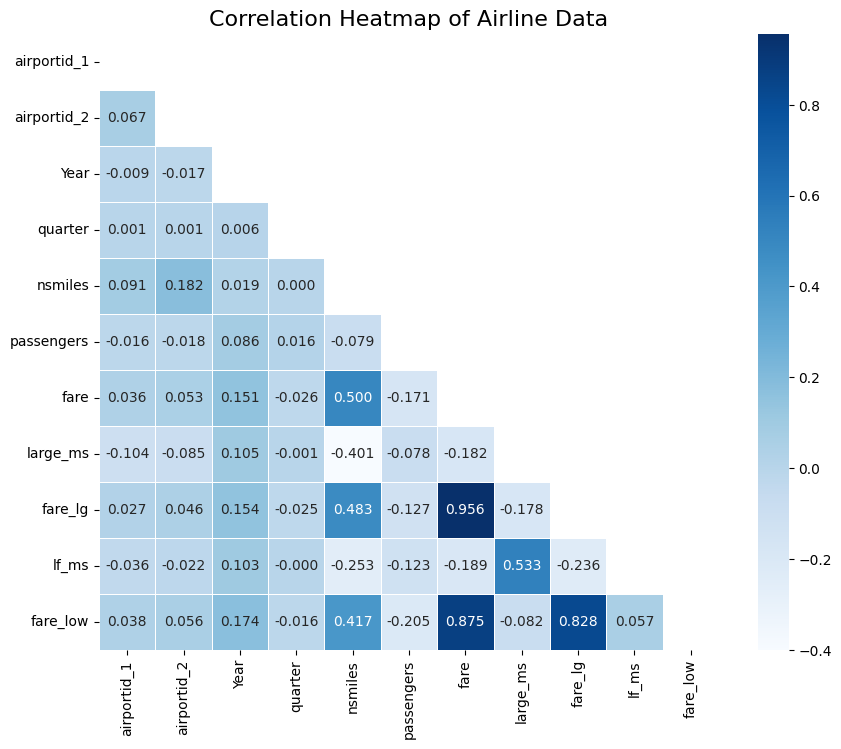

In [17]:
# Create a correlation matrix
corr_matrix = planes_numeric.corr()
plt.figure(figsize=(10, 8))  # Set the figure size

matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.5, fmt=".3f", mask = matrix)

# Add title and labels
plt.title('Correlation Heatmap of Airline Data', fontsize=16)
plt.show()

# Does the data have a linear or non-linear structure? #

In [18]:
correlated_variables = planes_numeric
correlated_variables = correlated_variables.dropna()
correlated_variables.isna().sum()

airportid_1    0
airportid_2    0
Year           0
quarter        0
nsmiles        0
passengers     0
fare           0
large_ms       0
fare_lg        0
lf_ms          0
fare_low       0
dtype: int64

In [19]:
correlated_variables

,airportid_1,airportid_2,Year,quarter,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
0,10135,14112,2021,3,970,180,81.43,1.0000,81.43,1.0000,81.43
1,10135,15304,2021,3,970,19,208.93,0.4659,219.98,0.1193,154.11
2,10140,11259,2021,3,580,204,184.56,0.9968,184.44,0.9968,184.44
3,10140,11298,2021,3,580,264,182.64,0.9774,183.09,0.9774,183.09
4,10140,14107,2021,3,328,398,177.11,0.6061,184.49,0.3939,165.77
...,...,...,...,...,...,...,...,...,...,...,...
245950,15412,12953,2024,1,665,207,278.70,0.7503,287.44,0.2359,248.46
245951,15412,11697,2024,1,724,277,148.69,0.8255,114.45,0.8255,114.45
245952,15412,13303,2024,1,724,70,330.19,0.8057,321.92,0.8057,321.92
245953,15412,14112,2024,1,550,178,95.65,1.0000,95.65,1.0000,95.65


In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
correlated_variables.describe()


,airportid_1,airportid_2,Year,quarter,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000,244343.000000
mean,12437.736244,13248.480615,2008.577508,2.479093,1189.421056,301.442558,218.443940,0.665436,218.715074,0.450438,190.675939
std,1431.902181,1426.318834,8.688732,1.122082,702.889233,512.498452,79.533099,0.224410,84.659619,0.332669,73.577694
min,10135.000000,10466.000000,1993.000000,1.000000,109.000000,0.000000,50.000000,0.100000,50.000000,0.010000,50.000000
25%,11193.000000,12197.000000,2001.000000,1.000000,626.000000,22.000000,164.690000,0.480000,161.510000,0.158000,140.060000
50%,12266.000000,13303.000000,2009.000000,2.000000,1021.000000,114.000000,209.270000,0.652800,208.040000,0.360000,181.630000
75%,13487.000000,14679.000000,2016.000000,3.000000,1735.000000,342.000000,262.615000,0.872100,263.640000,0.750000,230.040000
max,16440.000000,15919.000000,2024.000000,4.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [21]:
scaled_data = preprocessing.scale(correlated_variables)
#
pca= PCA()
pca_results = pca.fit_transform(scaled_data)
pca_results


array([[-3.01630088,  1.64836695,  0.35397403, ..., -0.49274956,
         0.17619541, -0.09461144],
       [ 0.13648101, -0.62860982,  0.62226117, ...,  0.39501512,
         0.18091284, -0.04161425],
       [-1.40316644,  2.68919976,  1.4712342 , ...,  0.03958754,
         0.07712435, -0.04401786],
       ...,
       [ 1.99883674,  2.28982501, -0.1557439 , ...,  0.66651903,
        -0.07860864,  0.06041892],
       [-2.72289064,  1.52012907, -0.77281575, ..., -0.32400201,
         0.20369105, -0.08213471],
       [ 1.98431201,  0.77281663, -0.56787626, ...,  1.31117007,
        -0.0222263 ,  0.37313711]])

array([30.00046053, 15.33363979, 10.14597422,  9.46179059,  9.04504838,
        8.54865859,  6.70682739,  5.33763088,  3.95090783,  1.13208708,
        0.33697472])

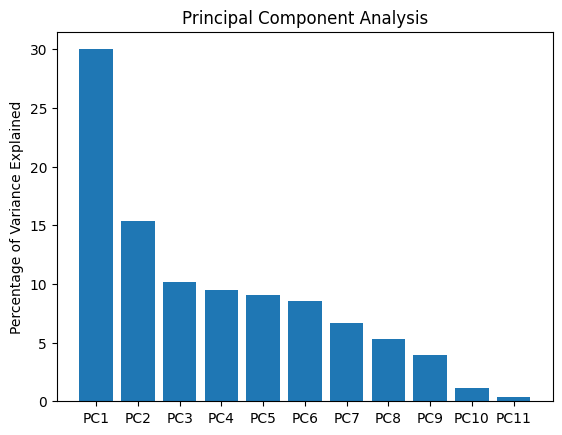

In [22]:
percent_variance_explained = pca.explained_variance_ratio_ * 100
labels = ['PC' + str(i) for i in range(1, len(percent_variance_explained) + 1)]
#
plt.bar(x = labels, height = percent_variance_explained)
plt.ylabel('Percentage of Variance Explained')
plt.title('Principal Component Analysis')
#
percent_variance_explained

Traditional Principal Component Analysis (PCA) is a linear method; it seeks to represent higher-dimensional dataset using hyperplanes. Hence, if PCA struggles to reduce the variance in a dataset to one (or at most) two PC variables, it is likely because of our data is non-linear in structure, meaning it does not follow one prinipal direction but rather branches in multiple directions. Therefore, to model the non-linear dependencies in `correlated_matrix`, a corresponding non-linear model should be used to predict `large_ms`.

# Developing a Non-Linear Model: A Decision Tree #

## Decision Tree on One Sample ##

In [23]:
#Grouping 'large_ms' into 'Low', 'Medium', 'High' classifications. 
bins = [0, 0.3, 0.6, 1]
groups = ['Low', 'Medium', 'High'] 
#
correlated_variables['large_ms_groupings'] = pd.cut(correlated_variables['large_ms'], bins, labels = groups)

/var/folders/gk/5trqd61s5f385h0bqf717zmh0000gn/T/ipykernel_62615/3364894189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_variables['large_ms_groupings'] = pd.cut(correlated_variables['large_ms'], bins, labels = groups)


In [24]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#
features = correlated_variables.drop(['large_ms', 'large_ms_groupings'], axis=1)
target = correlated_variables['large_ms_groupings']
#

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30)

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
#
predictions = decision_tree.predict(X_test)

In [27]:
accuracy = sum(predictions == y_test)/(len(y_test))
accuracy 

0.8836746108617656

## Model Cross-Validation ##

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=30)
scores = cross_val_score(decision_tree, features, target, scoring='accuracy', cv =kfold)
scores

array([0.88501913, 0.88399599, 0.88168368, 0.88571253, 0.88687894])